In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.filterwarnings("ignore")

In [28]:
data = pd.read_csv('Customer-Churn-Records.csv')
data.drop('RowNumber', axis=1, inplace=True)
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Régression Simple

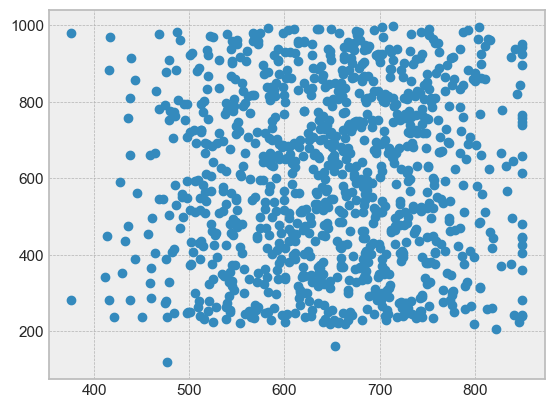

In [29]:
pca=data.head(1000)
# Régression simple
X = pca['CreditScore']
y = pca['Point Earned']
plt.plot(X,y,'o')

# ANOVA à un facteur

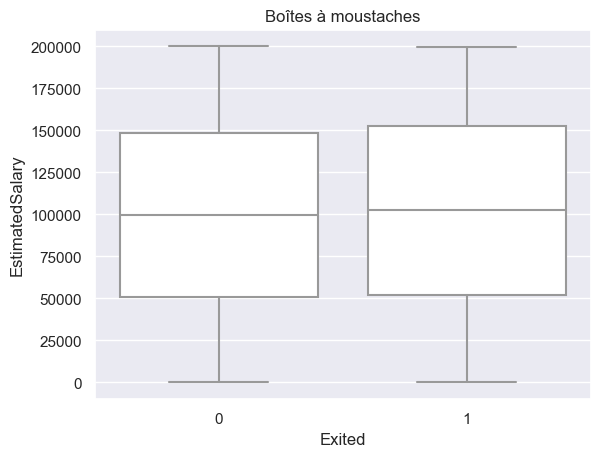

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Customer-Churn-Records.csv")

sns.set()

ax = sns.boxplot(x="Exited", y="EstimatedSalary", data=data,color='white')
plt.ylabel('EstimatedSalary')
plt.xlabel('Exited')
plt.title('Boîtes à moustaches')
plt.show()

In [32]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
anova = smf.ols('EstimatedSalary~Exited', data=data).fit()
sm.stats.anova_lm(anova)

,df,sum_sq,mean_sq,F,PR(>F)
Exited,1.0,5.158889e+09,5.158889e+09,1.559862,0.211715
Residual,9998.0,3.306610e+13,3.307272e+09,NaN,NaN


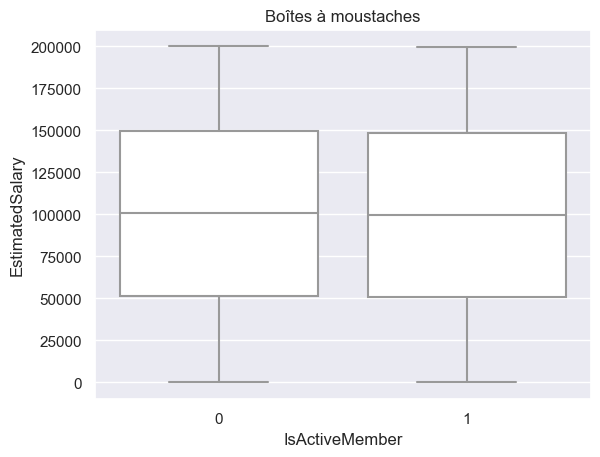

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("Customer-Churn-Records.csv")

# Créer la boîte à moustaches
ax = sns.boxplot(x="IsActiveMember", y="EstimatedSalary", data=data, color='white')

# Ajouter des étiquettes et un titre
plt.xlabel('IsActiveMember')
plt.ylabel('EstimatedSalary')
plt.title('Boîtes à moustaches')

# Afficher le graphique
plt.show()

In [33]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
anova = smf.ols('EstimatedSalary~IsActiveMember', data=data).fit()
sm.stats.anova_lm(anova)

,df,sum_sq,mean_sq,F,PR(>F)
IsActiveMember,1.0,4.314115e+09,4.314115e+09,1.3044,0.253438
Residual,9998.0,3.306695e+13,3.307356e+09,NaN,NaN


In [35]:
anova_exited_isactive = smf.ols('EstimatedSalary~Exited+IsActiveMember', data=data).fit()
sm.stats.anova_lm(anova_exited_isactive)

,df,sum_sq,mean_sq,F,PR(>F)
Exited,1.0,5.158889e+09,5.158889e+09,1.559850,0.211716
IsActiveMember,1.0,3.039280e+09,3.039280e+09,0.918962,0.337771
Residual,9997.0,3.306306e+13,3.307298e+09,NaN,NaN


# ANOVA à 2 facteurs

In [36]:
anova_exited_isactive = smf.ols('EstimatedSalary~Exited*IsActiveMember', data=data).fit()
sm.stats.anova_lm(anova_exited_isactive)

,df,sum_sq,mean_sq,F,PR(>F)
Exited,1.0,5.158889e+09,5.158889e+09,1.559695,0.211739
IsActiveMember,1.0,3.039280e+09,3.039280e+09,0.918871,0.337795
Exited:IsActiveMember,1.0,2.865329e+07,2.865329e+07,0.008663,0.925847
Residual,9996.0,3.306303e+13,3.307626e+09,NaN,NaN


# ACP

In [38]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("Customer-Churn-Records.csv")
data.drop('RowNumber', axis=1, inplace=True)
print(data.shape) 

(10000, 17)


In [39]:
#nombre d'observation
n = data.shape[0]

#nombre de variables
p = data.shape[1] 

print(data)

      CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0          0.00      

In [43]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Charger les données
data = pd.read_csv("Customer-Churn-Records.csv")

# Sélectionner les colonnes numériques pour la standardisation
# Assurez-vous d'exclure les colonnes non numériques et la variable cible si elle existe
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Sélectionner uniquement les données numériques pour la standardisation
X = data[numerical_columns]

# Instanciation de l'objet StandardScaler
scaler = StandardScaler()

# Transformation des données - centrage-réduction (Z-score normalization)
Z = scaler.fit_transform(X)

# Créer un nouveau DataFrame avec les données standardisées
data_standardized = pd.DataFrame(Z, columns=numerical_columns)

# Afficher les premières lignes du DataFrame standardisé
print(data_standardized.head())


   RowNumber  CustomerId  CreditScore       Age    Tenure   Balance  \
0  -1.731878   -0.783213    -0.326221  0.293517 -1.041760 -1.225848   
1  -1.731531   -0.606534    -0.440036  0.198164 -1.387538  0.117350   
2  -1.731185   -0.995885    -1.536794  0.293517  1.032908  1.333053   
3  -1.730838    0.144767     0.501521  0.007457 -1.387538 -1.225848   
4  -1.730492    0.652659     2.063884  0.388871 -1.041760  0.785728   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary    Exited  \
0      -0.911583   0.646092        0.970243         0.021886  1.976555   
1      -0.911583  -1.547768        0.970243         0.216534 -0.505931   
2       2.527057   0.646092       -1.030670         0.240687  1.976555   
3       0.807737  -1.547768       -1.030670        -0.108918 -0.505931   
4      -0.911583   0.646092        0.970243        -0.365276 -0.505931   

   Complain  Satisfaction Score  Point Earned  
0  1.972908           -0.721130     -0.630839  
1  1.972908           -0.009816 

In [44]:
import numpy

#écart-type
print(numpy.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [46]:
#classe pour l'ACP
from sklearn.decomposition import PCA

#instanciation
acp = PCA(svd_solver='full')

In [33]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA()

#Coordonées dans le nouvel espace
coord = acp.fit_transform(Z)
import matplotlib.pyplot as plt
print(coord)

[[ 2.47426534e+00  5.45458274e-01  4.64700276e-01 ... -5.61200159e-01
  -1.91697611e+00  2.65716964e-03]
 [ 1.08002495e+00 -7.62600061e-01  1.03699961e+00 ... -3.47203974e-01
  -7.76170986e-01 -1.75200079e+00]
 [ 2.84791028e+00  1.51738755e+00 -1.86197798e+00 ... -1.09140481e+00
   2.40674742e+00  6.86489333e-03]
 ...
 [ 2.18012699e+00  4.54364759e-01  8.64330976e-01 ... -1.05910432e+00
  -2.11275498e+00  3.86688920e-03]
 [ 2.65494515e+00  1.24294082e+00 -1.23477432e-01 ... -1.96427068e-01
   2.84203130e-01 -8.26188654e-04]
 [-6.82680358e-01 -1.50456219e+00 -7.57794446e-01 ...  9.02820635e-02
   4.19575022e-02  8.62130494e-04]]


In [47]:
#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)

14


In [48]:
#valeur corrigée
valPropre = (n-1)/n*acp.explained_variance_
print(valPropre)

[2.20393294 1.27745469 1.10182989 1.03843524 1.01808395 1.0104741
 0.99923812 0.98910499 0.98505145 0.97061217 0.96122006 0.75923703
 0.68102589 0.00429948]


In [49]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.15742378 0.09124676 0.07870214 0.07417395 0.07272028 0.07217672
 0.07137415 0.07065036 0.07036082 0.06932944 0.06865858 0.05423122
 0.04864471 0.00030711]


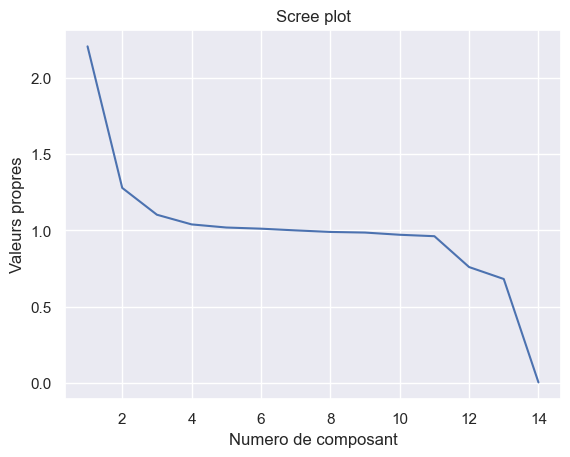

In [51]:
import matplotlib
import matplotlib.pyplot as plt

#scree plot
plt.plot(numpy.arange(1,len(explained_variance) + 1),valPropre)
plt.title("Scree plot")
plt.ylabel("Valeurs propres")
plt.xlabel("Numero de composant")
plt.show()

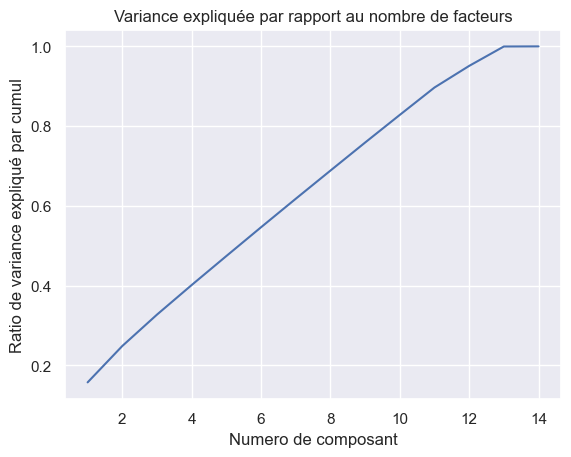

In [53]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,len(explained_variance)+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Variance expliquée par rapport au nombre de facteurs")
plt.ylabel("Ratio de variance expliqué par cumul")
plt.xlabel("Numero de composant")
plt.show()

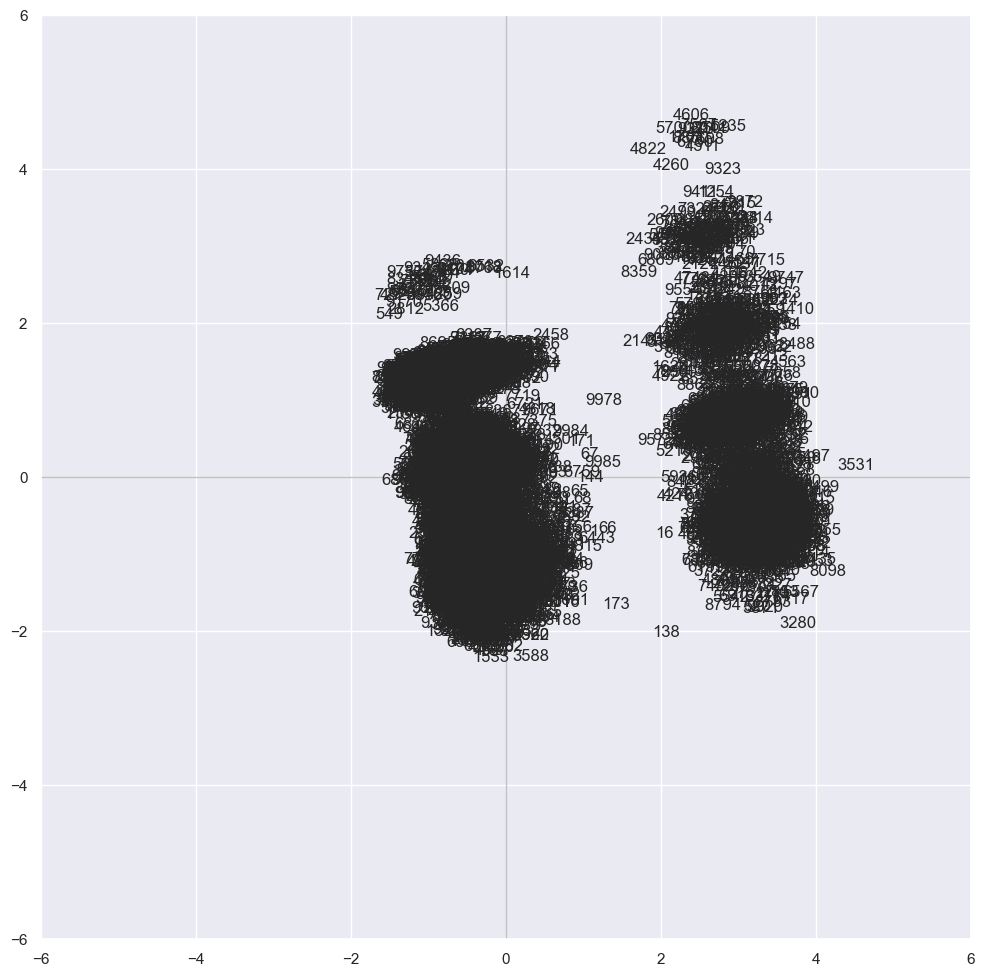

In [54]:
#positionnement des individus dans le premier plan factoriel
fig, axes = plt.subplots(figsize=(12,12))

#même limites en abscisse
axes.set_xlim(-6,6) 
#et en ordonnée
axes.set_ylim(-6,6) 

#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))

#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

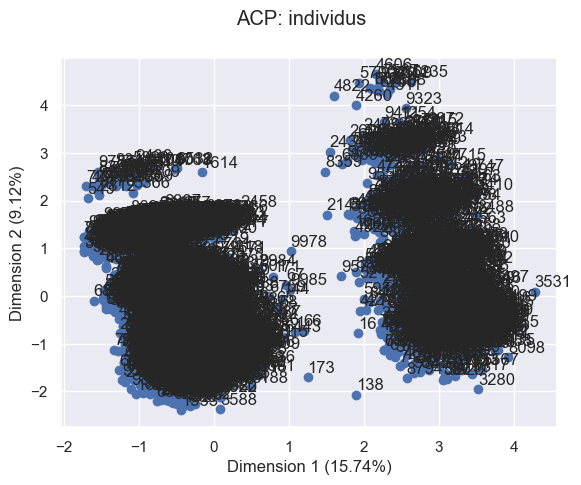

In [35]:
# plotting scatter plot
plt.scatter(coord[:,0],coord[:,1])

#pourcentage des axes
pr1=acp.explained_variance_ratio_[0]/np.sum(acp.explained_variance_ratio_)
pr1=round(pr1*100,2)
pr2=acp.explained_variance_ratio_[1]/np.sum(acp.explained_variance_ratio_)
pr2=round(pr2*100,2)


# Loop for annotation of all points
for i in range(len(coord)):
    plt.annotate(data.index[i],(coord[i,0],coord[i,1] + 0.1))
plt.xlabel("Dimension 1 ({}%)".format(pr1)) # modification du nom de l'axe X
plt.ylabel("Dimension 2 ({}%)".format(pr2)) # idem pour axe Y
plt.suptitle("ACP: individus") # titre général
plt.show()

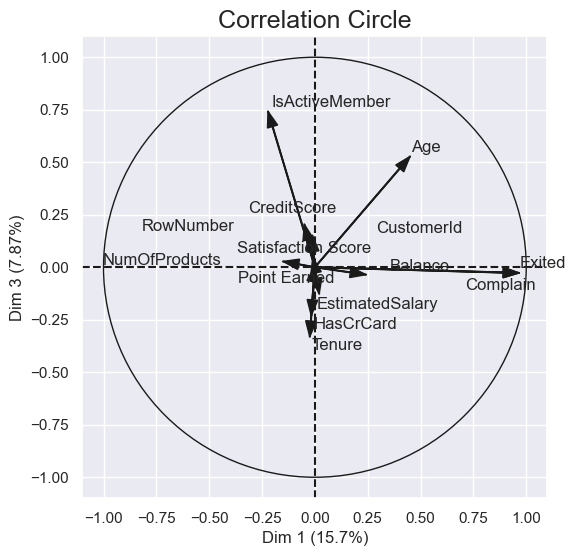

In [39]:
from mlxtend.plotting import plot_pca_correlation_graph

# Sélectionner les colonnes numériques pour les noms de colonnes
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Tracer le graphe de corrélation PCA
figure, correlation_matrix = plot_pca_correlation_graph(Z,
                                                        numerical_columns,
                                                        dimensions=(1, 3),
                                                        figure_axis_size=6)


# AFC

In [ ]:
import pandas as pd
from fanalysis.ca import CA
import numpy as np
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv('Customer-Churn-Records.csv')
data.drop('RowNumber', axis=1, inplace=True)
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [68]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Create DataFrame from the provided data
data=data[['Geography','NumOfProducts','Satisfaction Score','EstimatedSalary']]
df = pd.DataFrame(data)

# Set the 'Task' column as the index
df.set_index('Geography', inplace=True)

# Perform chi-square test of independence
stat, p_value, dof, expected = chi2_contingency(df)

print("Chi-square Statistic:", stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-square Statistic: 240770.74725051122
P-value: 0.0
Degrees of Freedom: 19998
Expected Frequencies Table:
[[1.54941787e+00 3.05165049e+00 1.01347279e+05]
 [1.72055696e+00 3.38871687e+00 1.12541471e+05]
 [1.74182173e+00 3.43059883e+00 1.13932398e+05]
 ...
 [6.43444871e-01 1.26729457e+00 4.20876693e+04]
 [1.42009532e+00 2.79694372e+00 9.28883030e+04]
 [5.83903078e-01 1.15002424e+00 3.81930461e+04]]


In [69]:
# On crée une instale de la classe CA en passant les étiquettes de lignes et les colonnes
afc = CA(row_labels=df.index.values, col_labels=df.columns.values, stats=True)

In [70]:
afc.fit(df.values)

CA(col_labels=array(['NumOfProducts', 'Satisfaction Score', 'EstimatedSalary'],
      dtype=object),
   row_labels=array(['France', 'Spain', 'France', ..., 'France', 'Germany', 'France'],
      dtype=object))

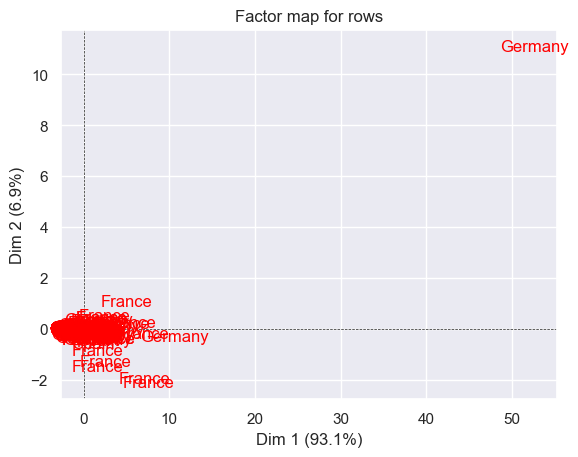

In [71]:
afc.mapping_row(num_x_axis=1,num_y_axis=2)

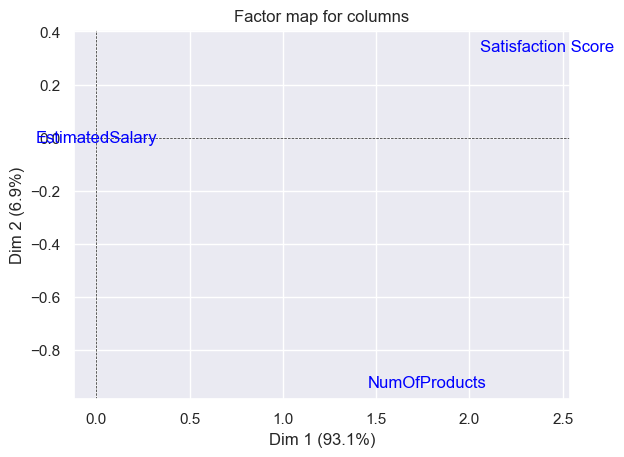

In [72]:
afc.mapping_col(num_x_axis=1,num_y_axis=2)

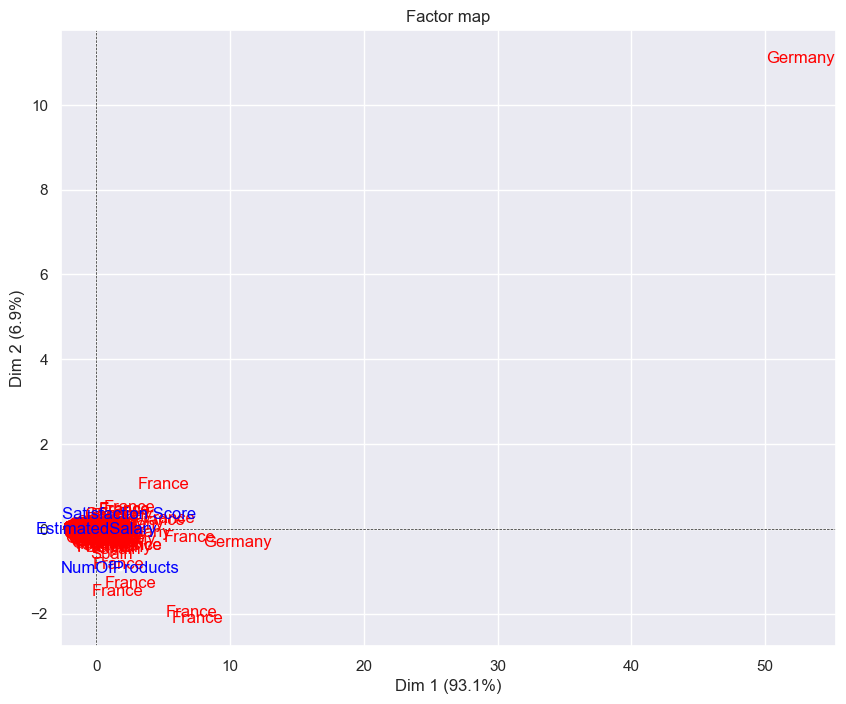

In [73]:
afc.mapping(1, 2, figsize=(10, 8))

# Classification

[[   648.25679669 100707.99442967]
 [   651.88586794  33963.53545862]
 [   651.49128174 167155.27454267]]


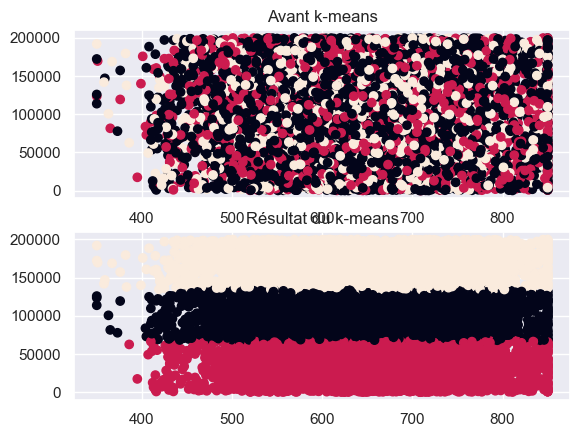

In [83]:
from sklearn.cluster import KMeans
data=data[['CreditScore','EstimatedSalary','Geography']]

observations = data.iloc[:,0:2] #pour extrère toutes les lignes

nb_groupes = 3 # la classification ce fait sur 3 grp

kmeans = KMeans(n_clusters=nb_groupes, random_state=0).fit(observations) 

# Affichage des centres

print(kmeans.cluster_centers_)

# Affichage des résultats avant k-means

import matplotlib.pyplot as plt

# Utiliser les noms d'espèce pour colorier les points

data["Geography"] = data["Geography"].astype('category') 

# 211 : 2 lignes ( nrows ), 1 colonne ( ncols ) et le nombre de plot.

plt.subplot(211) ; plt.title("Avant k-means")

plt.scatter(data.CreditScore,data.EstimatedSalary,

          c=data.Geography.cat.codes) ;

# Affichage des résultats du k-means

plt.subplot(212) ; plt.title("Résultat du k-means")

centers = pd.DataFrame(kmeans.cluster_centers_) 

centers.columns = observations.columns ; 

plt.scatter(data.CreditScore,data.EstimatedSalary,

         c=list(kmeans.predict(observations))) ;

plt.scatter(centers.CreditScore,centers.EstimatedSalary,

         c=range(nb_groupes),s=200,marker="s")

plt.show()

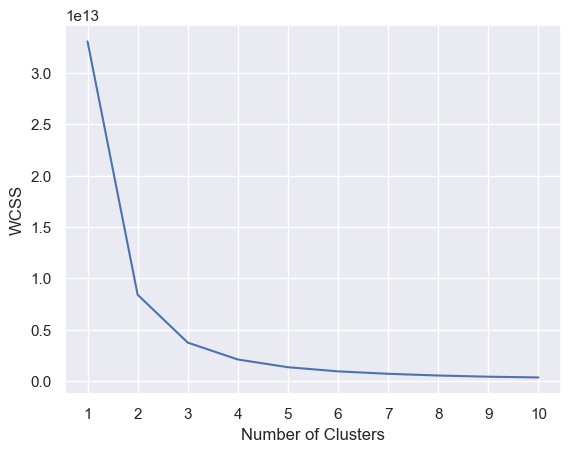

In [84]:
#create list to hold SSE values for each k
# WCSS - the sum of square distances between the centroids and each points.
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(observations)
    wcss.append(kmeans.inertia_)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(observations)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

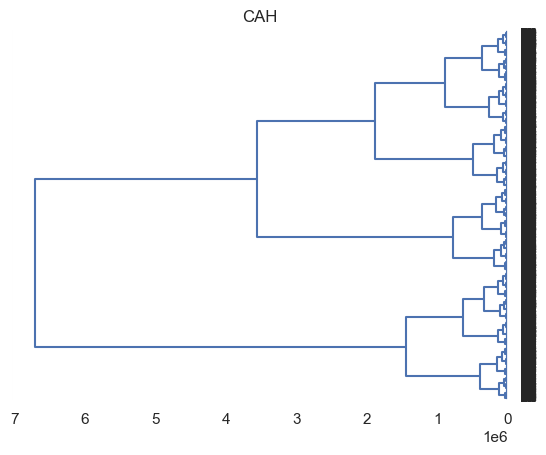

In [87]:
#Chargement des bibiliothèques

from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#Matrice des distances

Z = linkage(data.iloc[:,0:2],method='ward', metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")

dendrogram(Z,labels=data.index,orientation='left', color_threshold=0)

plt.show()

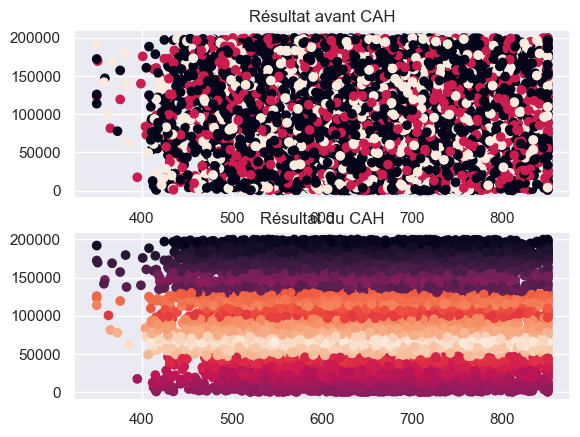

In [89]:
data["Geography"] = data["Geography"].astype('category') 

plt.subplot(211) ; plt.title("Résultat avant CAH")

plt.scatter(data.CreditScore,data.EstimatedSalary,

          c=data.Geography.cat.codes) ;

#découpage à la hauteur t = 7 : 3 groupes obtenus

groupes_cah = fcluster(Z,t=7,criterion='distance')

# Affichage des résultats du k-means

plt.subplot(212) ; plt.title("Résultat du CAH")

plt.scatter(data.CreditScore,data.EstimatedSalary, c=groupes_cah) ;

plt.show()

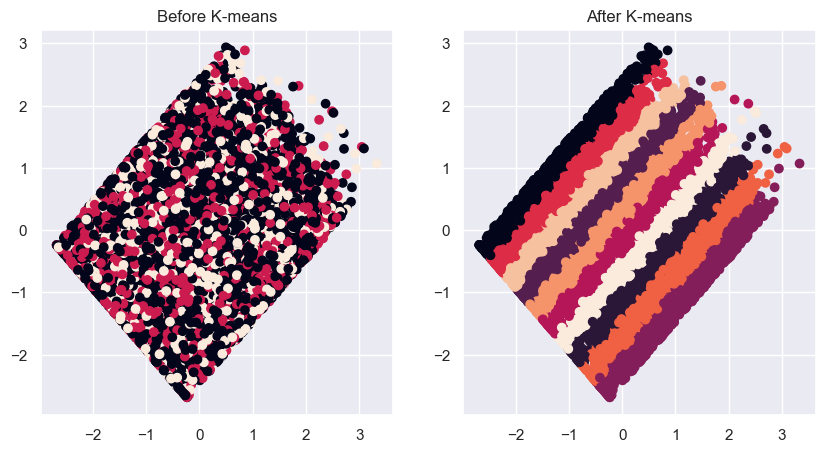

In [90]:
import matplotlib.pyplot as plt

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
observations_scaled = scaler.fit_transform(observations)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(observations_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Concatenate the principal components with the species column
finalDf = pd.concat([principalDf, data[['Geography']]], axis = 1)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Before K-means")
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=finalDf['Geography'].cat.codes)

plt.subplot(1, 2, 2)
plt.title("After K-means")
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c=list(kmeans.predict(observations)))

plt.show()

# AFD

In [100]:
data = pd.read_csv('Customer-Churn-Records.csv')
data.drop('RowNumber', axis=1, inplace=True)
data=data[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','EstimatedSalary','Satisfaction Score','Point Earned','IsActiveMember']]
X = data.drop(columns=['IsActiveMember'])  # Exclure la colonne cible pour former X
y = data['IsActiveMember']  # Sélectionner la colonne cible comme y
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,101348.88,2,464
1,608,41,1,83807.86,1,0,112542.58,3,456
2,502,42,8,159660.80,3,1,113931.57,3,377
3,699,39,1,0.00,2,0,93826.63,5,350
4,850,43,2,125510.82,1,1,79084.10,5,425


In [101]:
#Ajouter...
data = X.join(pd.Series(y, name='IsActiveMember'))
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Satisfaction Score,Point Earned,IsActiveMember
0,619,42,2,0.00,1,1,101348.88,2,464,1
1,608,41,1,83807.86,1,0,112542.58,3,456,1
2,502,42,8,159660.80,3,1,113931.57,3,377,0
3,699,39,1,0.00,2,0,93826.63,5,350,0
4,850,43,2,125510.82,1,1,79084.10,5,425,1


In [102]:
#Codage...
le = LabelEncoder()
y = le.fit_transform(data['IsActiveMember'])

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [104]:
lda.explained_variance_ratio_# les valeurs propres

array([1.])

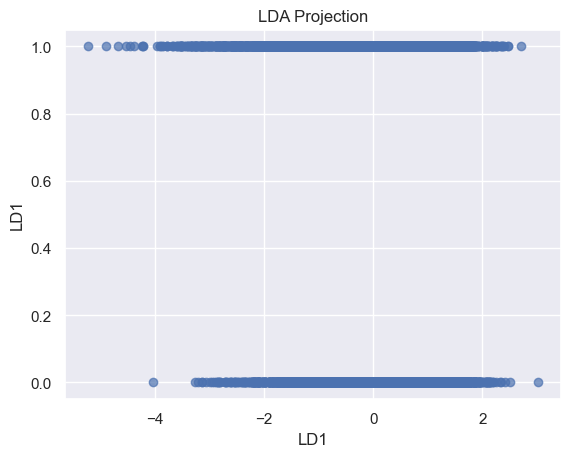

In [105]:
# Utilisez maintenant X_sampled et y_sampled pour votre analyse ou votre modélisation
plt.figure()
plt.xlabel('LD1')
plt.ylabel('LD1')  # Assurez-vous de spécifier la bonne dimension ici (LD1)
plt.scatter(X_lda[:, 0],y, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('LDA Projection')
plt.show()

In [109]:
# Select rows with Class = 0
class_0 =  data[ data['IsActiveMember'] == 0].sample(n=492, random_state=42)

# Select rows with Class = 1
class_1 =  data[ data['IsActiveMember'] == 1].sample(n=492, random_state=42)

# Concatenate both selected rows into a new DataFrame
new_data = pd.concat([class_0, class_1])
X1 = new_data.drop(["EstimatedSalary","CreditScore","IsActiveMember"],axis=1)
#Variable...
y1 = new_data["IsActiveMember"]
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X1, y1)

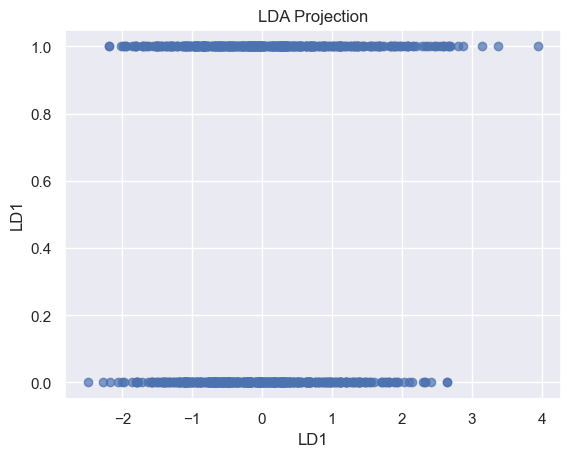

In [110]:
# Utilisez maintenant X_sampled et y_sampled pour votre analyse ou votre modélisation
plt.figure()
plt.xlabel('LD1')
plt.ylabel('LD1')  # Assurez-vous de spécifier la bonne dimension ici (LD1)
plt.scatter(X_lda[:, 0],y1, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('LDA Projection')
plt.show()